# Jupyter Notebook Example
## Testing
This is an example notebook.

1. This is item1
2. This is 2
3. this is 3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()





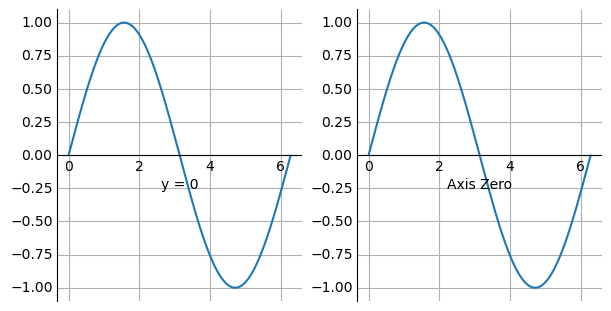

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import axisartist

fig = plt.figure(figsize=(6, 3), layout="constrained")
# To construct Axes of two different classes, we need to use gridspec (or
# MATLAB-style add_subplot calls).
gs = fig.add_gridspec(1, 2)


ax0 = fig.add_subplot(gs[0, 0], axes_class=axisartist.Axes)
# Make a new axis along the first (x) axis which passes through y=0.
ax0.axis["y=0"] = ax0.new_floating_axis(nth_coord=0, value=0,
                                        axis_direction="bottom")
ax0.axis["y=0"].toggle(all=True)
ax0.axis["y=0"].label.set_text("y = 0")
# Make other axis invisible.
ax0.axis["bottom", "top", "right"].set_visible(False)


# Alternatively, one can use AxesZero, which automatically sets up two
# additional axis, named "xzero" (the y=0 axis) and "yzero" (the x=0 axis).
ax1 = fig.add_subplot(gs[0, 1], axes_class=axisartist.axislines.AxesZero)
# "xzero" and "yzero" default to invisible; make xzero axis visible.
ax1.axis["xzero"].set_visible(True)
ax1.axis["xzero"].label.set_text("Axis Zero")
# Make other axis invisible.
ax1.axis["bottom", "top", "right"].set_visible(False)


# Draw some sample data.
x = np.arange(0, 2*np.pi, 0.01)
ax0.plot(x, np.sin(x))
ax1.plot(x, np.sin(x))

plt.show()

This plot above is super cool. we learned a lot of things>>>>>

In [3]:
print("Shiva Sajay")

Shiva Sajay


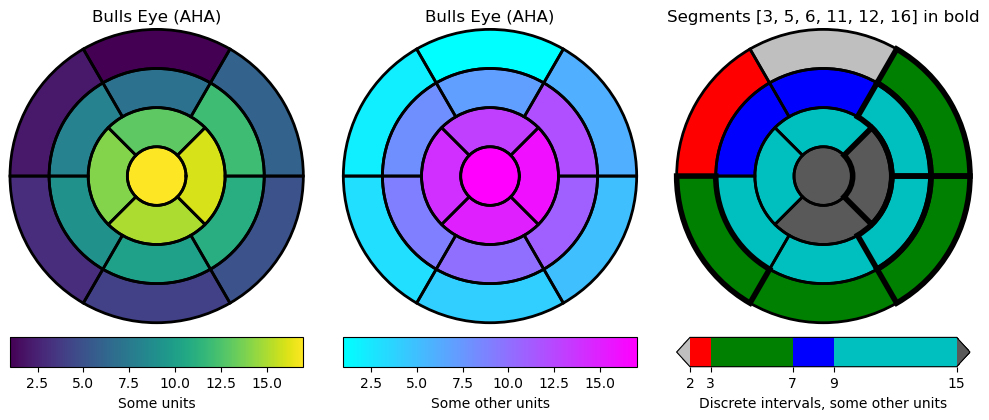

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl


def bullseye_plot(ax, data, seg_bold=None, cmap="viridis", norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : Axes
    data : list[float]
        The intensity values for each of the 17 segments.
    seg_bold : list[int], optional
        A list with the segments to highlight.
    cmap : colormap, default: "viridis"
        Colormap for the data.
    norm : Normalize or None, optional
        Normalizer for the data.

    Notes
    -----
    This function creates the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """

    data = np.ravel(data)
    if seg_bold is None:
        seg_bold = []
    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    r = np.linspace(0.2, 1, 4)

    ax.set(ylim=[0, 1], xticklabels=[], yticklabels=[])
    ax.grid(False)  # Remove grid

    # Fill segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            (0, 6, r[2], r[3]),
            (6, 12, r[1], r[2]),
            (12, 16, r[0], r[1]),
            (16, 17, 0, r[0]),
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               color=cmap(norm(data[start:stop])))

    # Now, draw the segment borders.  In order for the outer bold borders not
    # to be covered by inner segments, the borders are all drawn separately
    # after the segments have all been filled.  We also disable clipping, which
    # would otherwise affect the outermost segment edges.
    # Draw edges of segments 1-6, 7-12, 13-16.
    for start, stop, r_in, r_out in [
            (0, 6, r[2], r[3]),
            (6, 12, r[1], r[2]),
            (12, 16, r[0], r[1]),
    ]:
        n = stop - start
        dtheta = 2*np.pi / n
        ax.bar(np.arange(n) * dtheta + np.pi/2, r_out - r_in, dtheta, r_in,
               clip_on=False, color="none", edgecolor="k", linewidth=[
                   4 if i + 1 in seg_bold else 2 for i in range(start, stop)])
    # Draw edge of segment 17 -- here; the edge needs to be drawn differently,
    # using plot().
    ax.plot(np.linspace(0, 2*np.pi), np.linspace(r[0], r[0]), "k",
            linewidth=(4 if 17 in seg_bold else 2))


# Create the fake data
data = np.arange(17) + 1


# Make a figure and Axes with dimensions as desired.
fig = plt.figure(figsize=(10, 5), layout="constrained")
fig.get_layout_engine().set(wspace=.1, w_pad=.2)
axs = fig.subplots(1, 3, subplot_kw=dict(projection='polar'))
fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=1, vmax=17)
# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=axs[0].inset_axes([0, -.15, 1, .1]),
             orientation='horizontal', label='Some units')


# And again for the second colorbar.
cmap2 = mpl.cm.cool
norm2 = mpl.colors.Normalize(vmin=1, vmax=17)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2),
             cax=axs[1].inset_axes([0, -.15, 1, .1]),
             orientation='horizontal', label='Some other units')


# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.
cmap3 = (mpl.colors.ListedColormap(['r', 'g', 'b', 'c'])
         .with_extremes(over='0.35', under='0.75'))
# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [2, 3, 7, 9, 15]
norm3 = mpl.colors.BoundaryNorm(bounds, cmap3.N)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap3, norm=norm3),
             cax=axs[2].inset_axes([0, -.15, 1, .1]),
             extend='both',
             ticks=bounds,  # optional
             spacing='proportional',
             orientation='horizontal',
             label='Discrete intervals, some other units')


# Create the 17 segment model
bullseye_plot(axs[0], data, cmap=cmap, norm=norm)
axs[0].set_title('Bulls Eye (AHA)')

bullseye_plot(axs[1], data, cmap=cmap2, norm=norm2)
axs[1].set_title('Bulls Eye (AHA)')

bullseye_plot(axs[2], data, seg_bold=[3, 5, 6, 11, 12, 16],
              cmap=cmap3, norm=norm3)
axs[2].set_title('Segments [3, 5, 6, 11, 12, 16] in bold')

plt.show()

# Cool Shit
1. yo yo .........

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


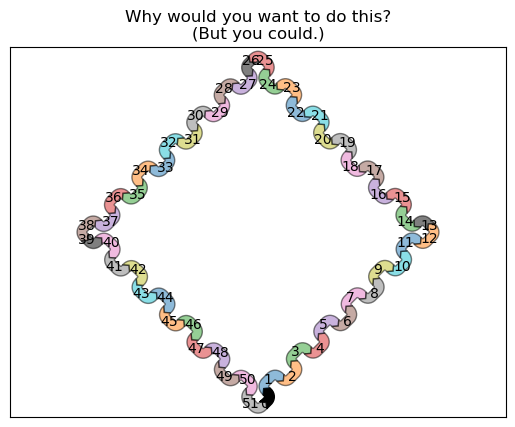

In [2]:
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

links_per_side = 6


def side(sankey, n=1):
    """Generate a side chain."""
    prior = len(sankey.diagrams)
    for i in range(0, 2*n, 2):
        sankey.add(flows=[1, -1], orientations=[-1, -1],
                   patchlabel=str(prior + i),
                   prior=prior + i - 1, connect=(1, 0), alpha=0.5)
        sankey.add(flows=[1, -1], orientations=[1, 1],
                   patchlabel=str(prior + i + 1),
                   prior=prior + i, connect=(1, 0), alpha=0.5)


def corner(sankey):
    """Generate a corner link."""
    prior = len(sankey.diagrams)
    sankey.add(flows=[1, -1], orientations=[0, 1],
               patchlabel=str(prior), facecolor='k',
               prior=prior - 1, connect=(1, 0), alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Why would you want to do this?\n(But you could.)")
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=[1, -1], orientations=[0, 1],
           patchlabel="0", facecolor='k',
           rotation=45)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
corner(sankey)
side(sankey, n=links_per_side)
sankey.finish()
# Notice:
# 1. The alignment doesn't drift significantly (if at all; with 16007
#    subdiagrams there is still closure).
# 2. The first diagram is rotated 45 deg, so all other diagrams are rotated
#    accordingly.

plt.show()